In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("/Users/Prosenjeet Saha/Desktop/Data/Fifa/Career Mode player datasets.xlsx")

In [6]:
#checking the column names
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

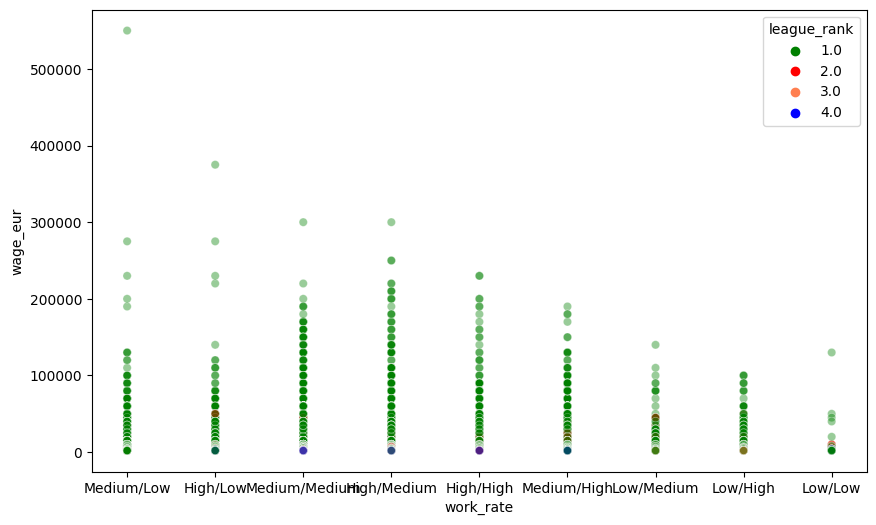

In [8]:
#visualization will be on the relationship between the work rate and wage by league rank
plt.figure(figsize=(10, 6))#Scatter plot
ax = sns.scatterplot(x ='work_rate',
                    y = df['wage_eur'],
                    hue = "league_rank",
                    data = df,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )

In [17]:
len(df['nationality'].unique())

149

In [18]:
#A word cloud of nationalities will help understand which nationalities are dominating. 
#For doing that we need to join all the nationalities and then make a word cloud.
nationality = " ".join(n for n in df['nationality'])

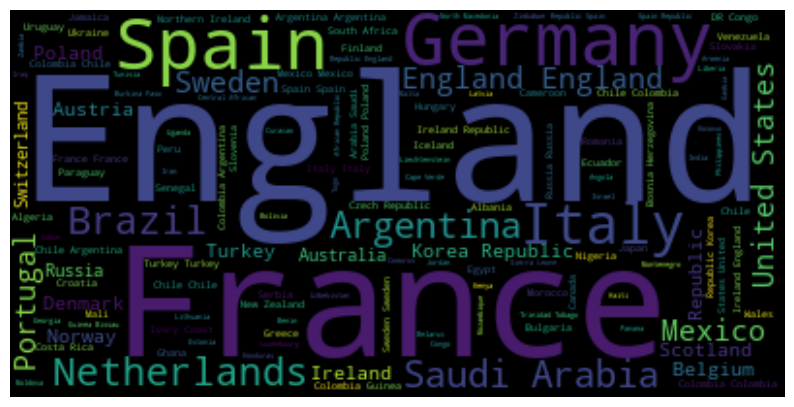

In [19]:
from wordcloud import WordCloud
plt.figure(figsize=(10, 10))
wc = WordCloud().generate(nationality)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
nationality_count = df['nationality'].value_counts()
nationality_count[:20]

England                1627
Spain                  1051
France                  958
Argentina               867
Italy                   795
Germany                 701
Colombia                543
Republic of Ireland     460
Netherlands             419
Brazil                  416
Mexico                  416
Chile                   411
Sweden                  398
Saudi Arabia            362
Poland                  342
United States           342
Turkey                  341
Portugal                337
Korea Republic          328
Scotland                323
Name: nationality, dtype: int64

Text(0.5, 1.0, 'Distribution of age of the players')

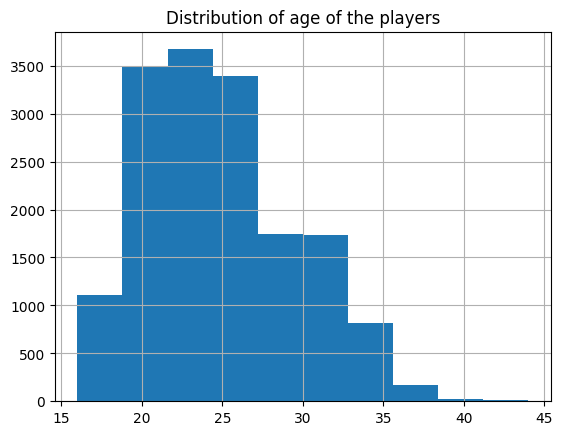

In [21]:
#Soccer players have a certain active timeframe in their lives. The distribution of age is here
df['age'].hist()
plt.title("Distribution of age of the players")

In [22]:
#It will be a good idea to check if the distribution matches the distribution of age of top nationalities, leagues, and clubs based on the number of players. 
#First let’s make the DataFrame based on the top nationalities, clubs, and leagues:
top_20_nat= nationality_count.index[:20]
df_nationality = df[df.nationality.isin(top_20_nat)]
clubs_count = df['club_name'].value_counts()
top_20_club = clubs_count[:20].index
df_clubs = df[df.club_name.isin(top_20_club)]
league_count = df['league_name'].value_counts()
top_20_leagues = league_count[:20].index
df_league = df[df.league_name.isin(top_20_leagues)]

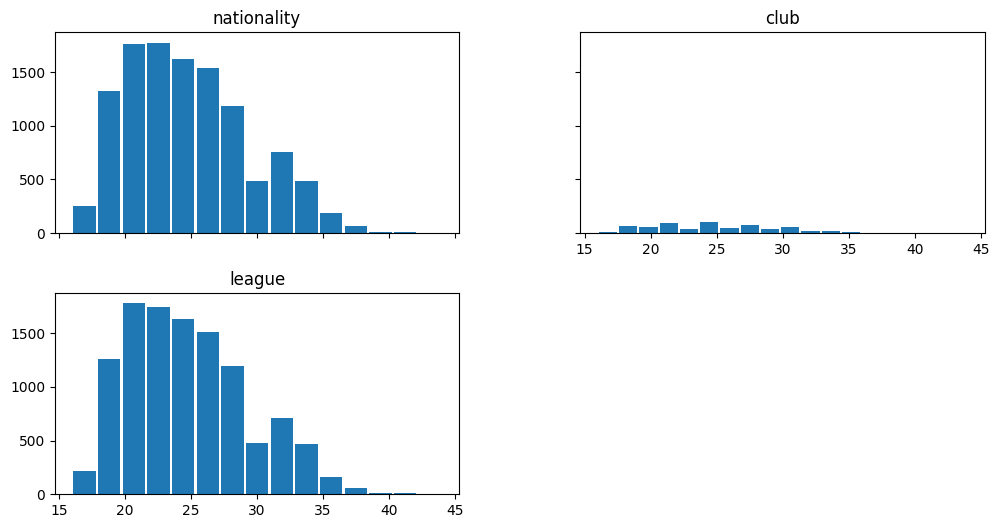

In [23]:
#I want to put the distribution of ages in the same plot to compare the distribution properly:
pd.DataFrame({'nationality': df_nationality['age'], 
              'club': df_clubs['age'], 
              'league': df_league['age']}).hist(bins = 15,
                                                  figsize=(12, 6),
                                                  grid=False,
                                                  rwidth=0.9,
                                                  sharex=True,
                                                  sharey=True)
plt.show()

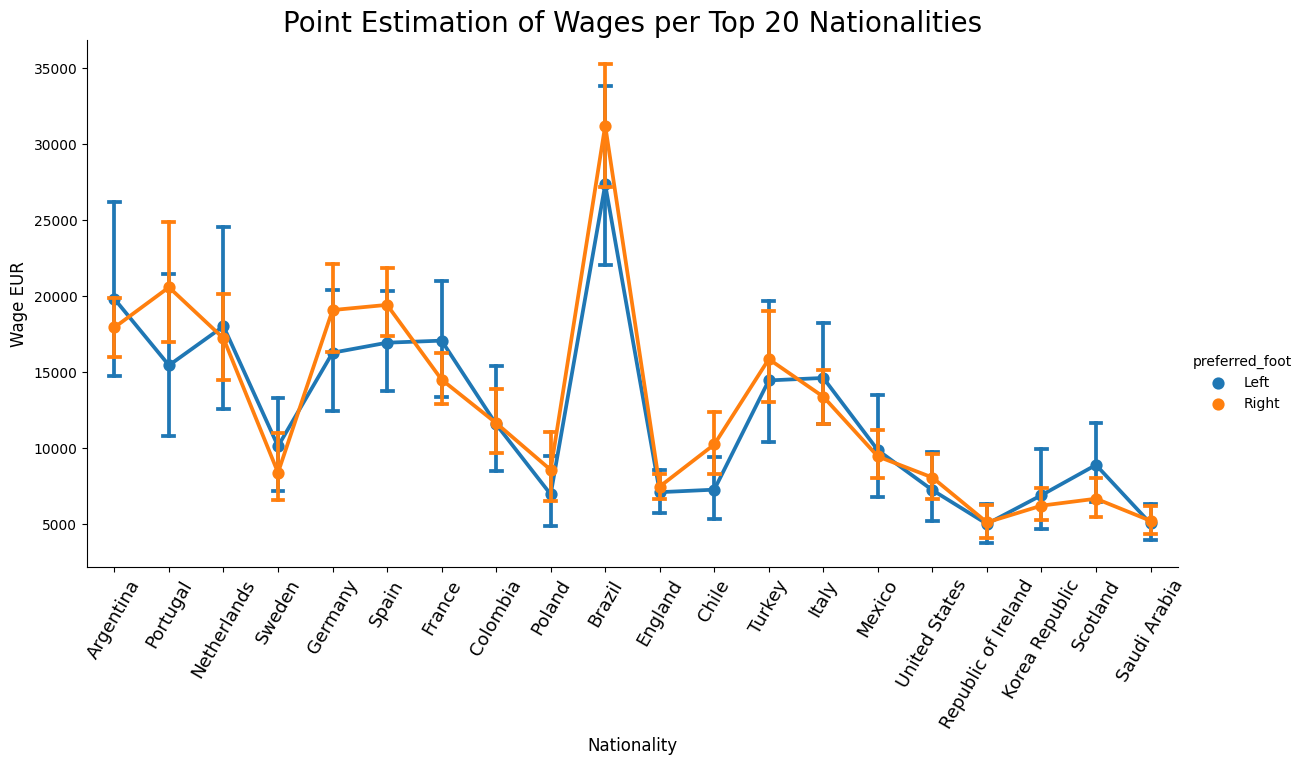

In [24]:
#Let’s see a plot that gives a point estimation of wages for each nationality using the top 20 nationalities DataFrame we created.
ax = sns.catplot(x = 'nationality', y = 'wage_eur', data = df_nationality,
                hue = 'preferred_foot', height=6, aspect=2,
                capsize=0.2, kind='point')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Wage EUR", fontsize=12)
plt.title("Point Estimation of Wages per Top 20 Nationalities", fontsize=20)
plt.xticks(rotation = 60, fontsize=13)
plt.show()

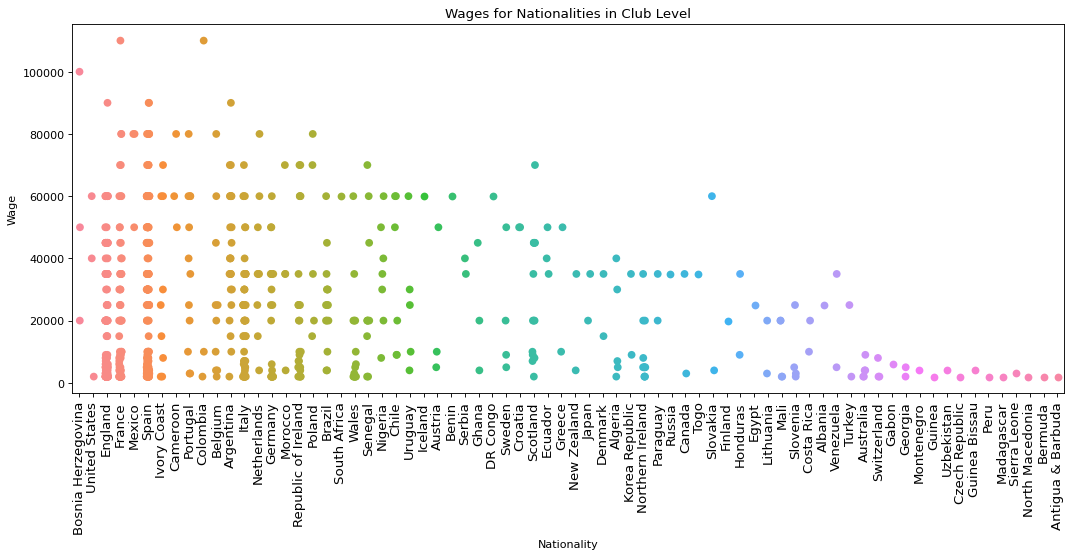

In [25]:
# Let’s see the top 20 nationality players’ wages at the club level
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
sns.stripplot(x = "nationality", y = "wage_eur",
              data=df_clubs, size = 7, ax=ax)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Wage")
plt.title("Wages for Nationalities in Club Level")
plt.show()

In [26]:
#Below is the function that makes a dictionary where keys will be values of nation_position column and values will a unique integer for each value.
def make_dictionary(col):
    dictn = {}
    val = 0
    for i in col.unique():
        if i not in dictn:
            dictn[i] = val+1
            val += 1
    return dictn

In [27]:
#Now, we will make a new column named nation_position1 where data type will be integers:
new_nation_position= make_dictionary(df['nation_position'])
df['nation_position1'] = df['nation_position'].replace(new_nation_position)

In [29]:
plt.figure(figsize = (18, 10))
grid = plt.GridSpec(4, 4, wspace =0.3, hspace = 0.8)

<Figure size 1800x1000 with 0 Axes>

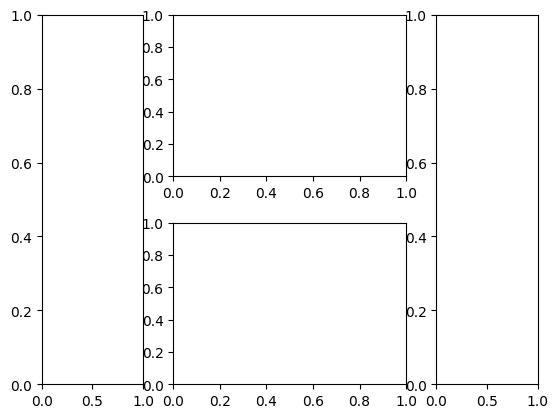

In [30]:
g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])
g3 = plt.subplot(grid[2:, 1:3])
g4 = plt.subplot(grid[:, 3])

In [31]:
g1.set_title("Distribution of Wage", fontsize=12)
sns.kdeplot(x = "value_eur", hue="preferred_foot", 
            vertical=True,
            data=df, ax=g1)

C:\Users\Prosenjeet Saha\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Distribution of Wage'}, xlabel='Density', ylabel='value_eur'>

In [34]:
df['international_reputation'].value_counts()

1    14512
2     1362
3      235
4       37
5        9
Name: international_reputation, dtype: int64

<Figure size 1500x1000 with 0 Axes>

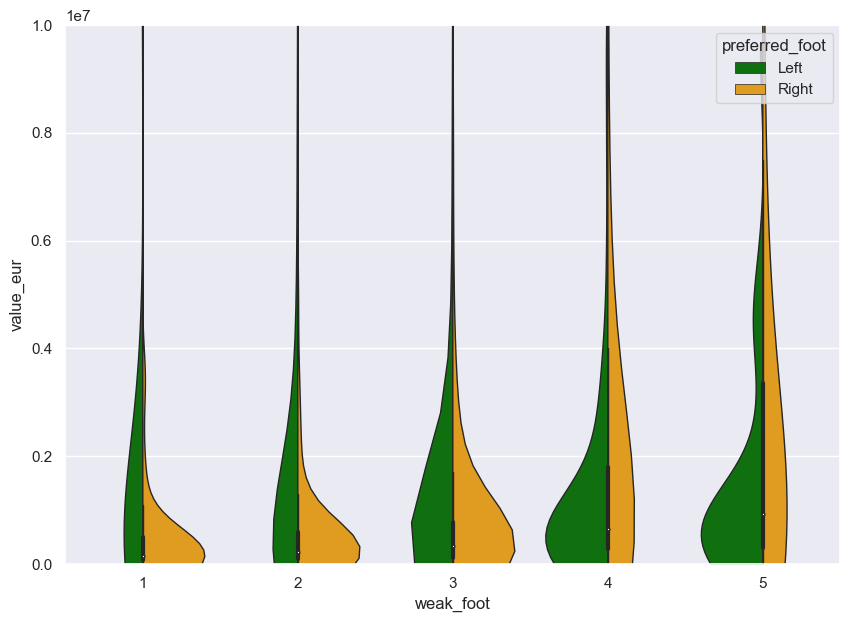

In [35]:
plt.figure(figsize=(15, 10))
sns.set()
_, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x="weak_foot",
              y="value_eur",
              hue = "preferred_foot",
              data=df,
              split=True,
              bw=.4,
              cut = 0.2,
              linewidth=1,
              palette=sns.color_palette(["green", "orange"]))
ax.set(ylim = (-0.1, 1*1e7))
plt.show()

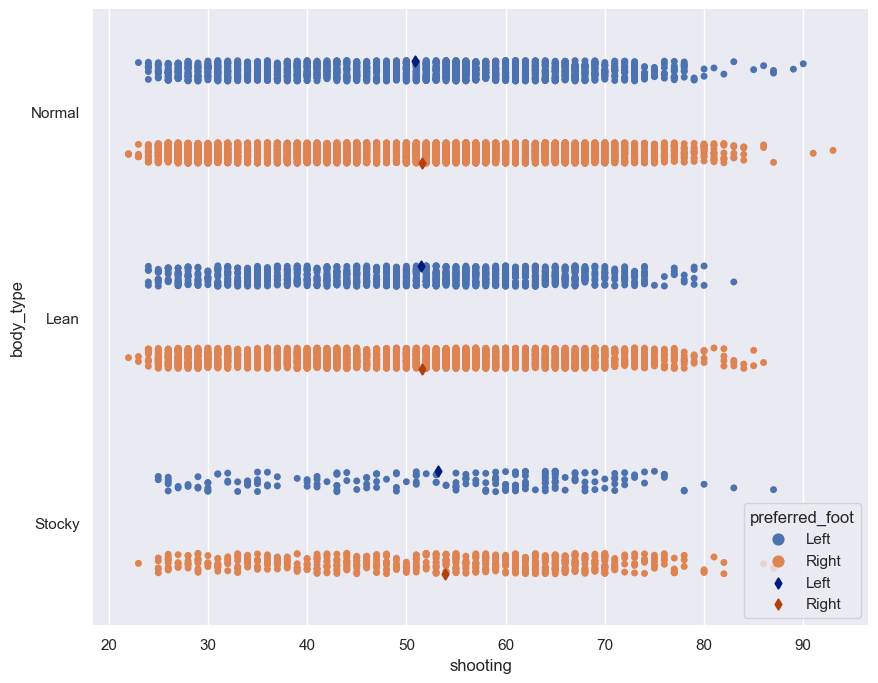

In [36]:
# relationship between body type and shooting
_, ax = plt.subplots(figsize=(10, 8))
sns.despine(bottom=True, left=True)
sns.stripplot(x = "shooting",
       y = "body_type",
       hue = "preferred_foot",
       data = df,
       dodge = 0.8, zorder=1)
sns.pointplot(x = "shooting",
              y = "body_type",
              hue = "preferred_foot",
              data=df, dodge=0.5, join=False,
              palette="dark", markers="d",
              scale=0.75, ci=None)
handles, labels = ax.get_legend_handles_labels()

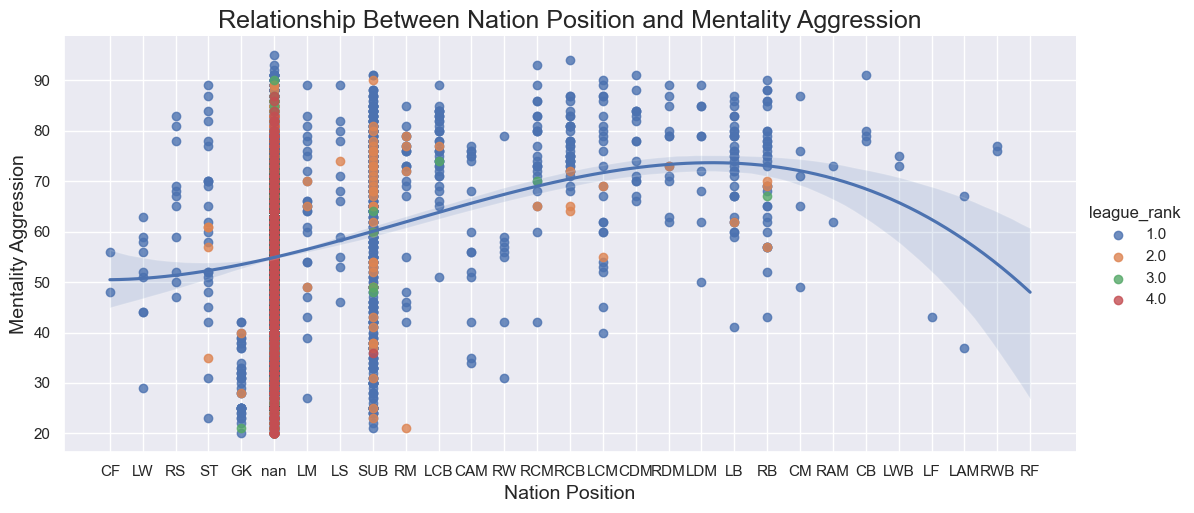

In [39]:
ax = sns.lmplot(x = "nation_position1",
               y = "mentality_aggression",
               data = df, hue = "league_rank", fit_reg = False, height = 5, aspect = 2.2)
sns.regplot(x = "nation_position1",
               y = "mentality_aggression",
               data = df, scatter=False, ax=ax.axes[0, 0], order = 3)
plt.ylabel("Mentality Aggression")
plt.xticks(list(range(1,30)), list(df['nation_position'].unique()))
plt.title("Relationship Between Nation Position and Mentality Aggression", fontsize=18)
plt.xlabel("Nation Position", fontsize=14)
plt.ylabel("Mentality Aggression", fontsize=14)
plt.show()

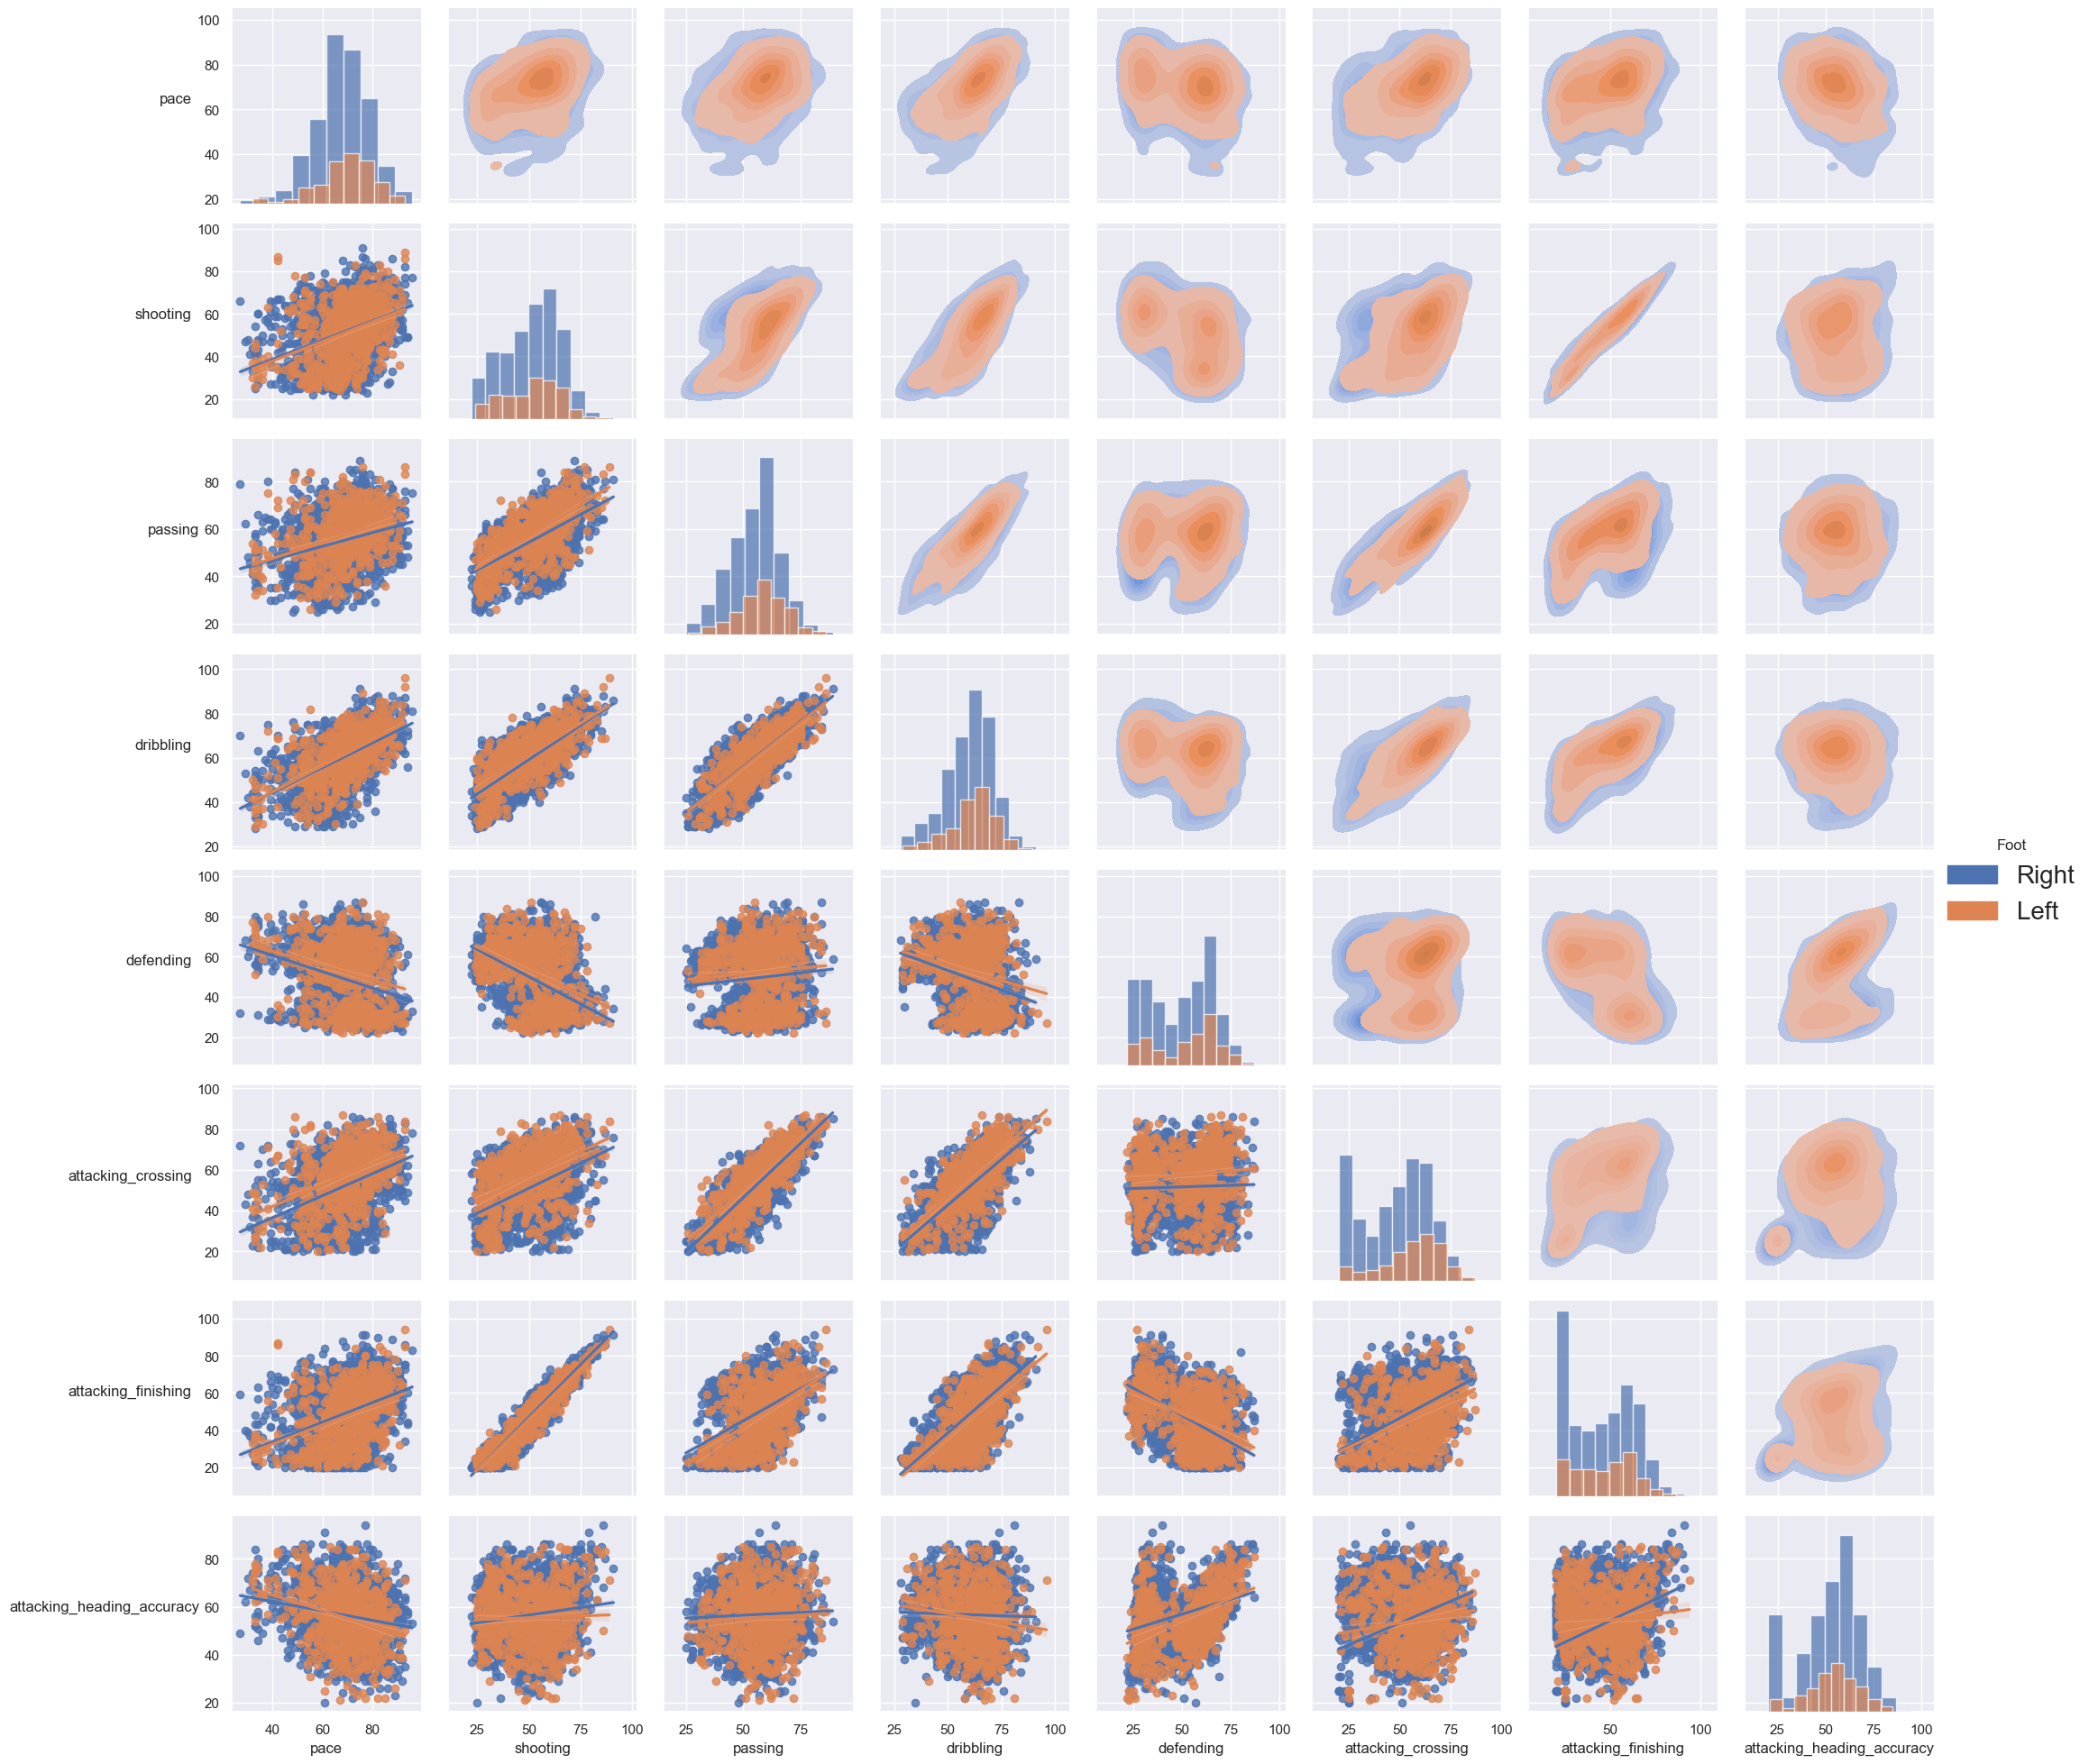

In [40]:
sns.set(color_codes=True)
plt.rcParams["axes.labelsize"] = 20
g1 = sns.PairGrid(df.sample(frac = 0.2), vars = ['pace', 'shooting',
       'passing', 'dribbling', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy'],
              hue = 'preferred_foot')
g1.map_lower(sns.regplot)
g1.map_diag(plt.hist, alpha=0.7)
g1.map_upper(sns.kdeplot, shade=True)
g1.add_legend(title='Foot', fontsize=20)
for axes in g1.axes.flat:
     axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')

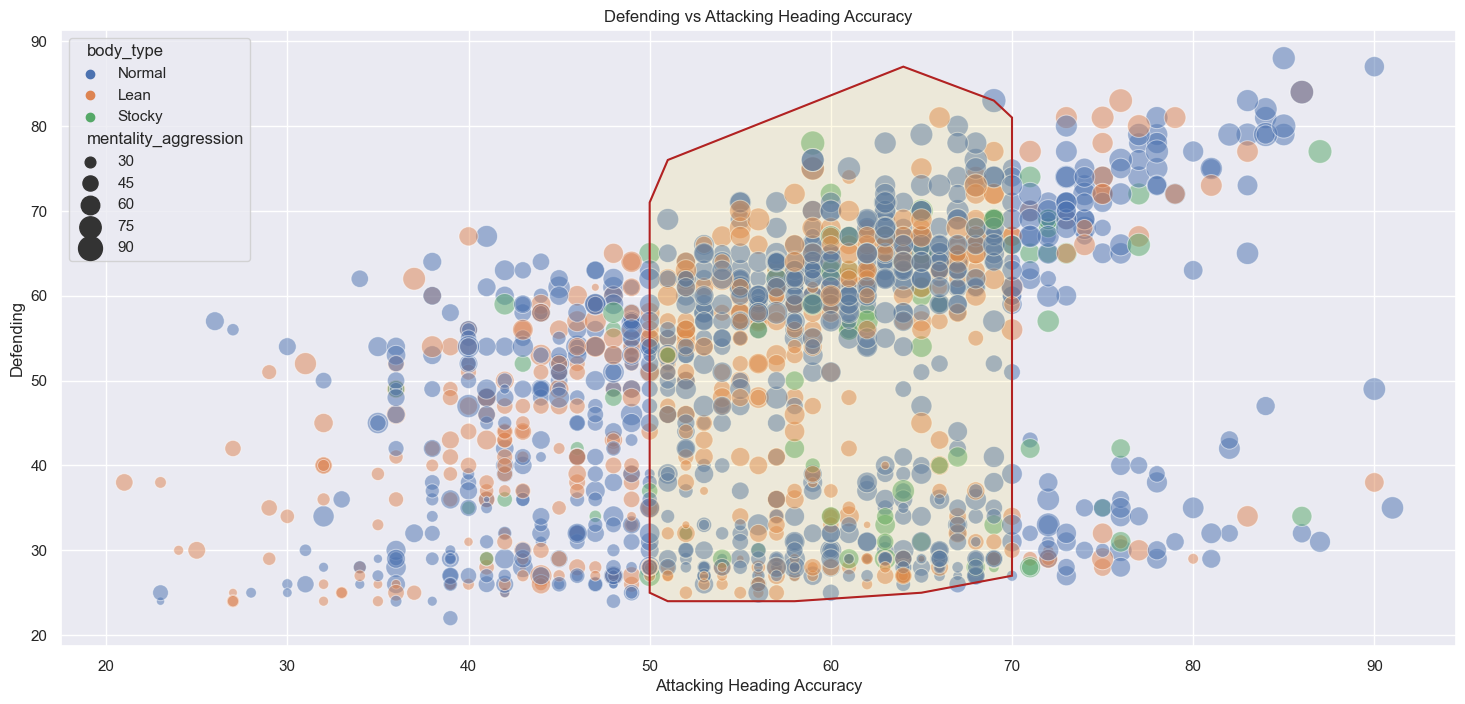

In [41]:
df2 = df[['attacking_heading_accuracy', 'defending', 'body_type', 'mentality_aggression']]
df_encircle=df2[(df2['attacking_heading_accuracy'] >=50) & (df2['attacking_heading_accuracy'] <=70)].dropna()
df_encircle
from scipy.spatial import ConvexHull
plt.figure(figsize=(18, 8))
ax = sns.scatterplot(x = "attacking_heading_accuracy", y = "defending", 
                 hue = "body_type",
                     alpha = 0.5, size = "mentality_aggression", sizes = (20, 300),
                 data = df.sample(frac=0.10))
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax=plt.gca()
        p=np.c_[x, y]
        hull = ConvexHull(p)
        poly=plt.Polygon(p[hull.vertices, :], **kw)
        ax.add_patch(poly)
        
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "k", fc="gold",
        alpha = 0.1)
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "firebrick", fc="None",
        linewidth = 1.5)
plt.xlabel("Attacking Heading Accuracy", fontsize=12)
plt.ylabel("Defending", fontsize=12)
plt.title("Defending vs Attacking Heading Accuracy")
plt.show()

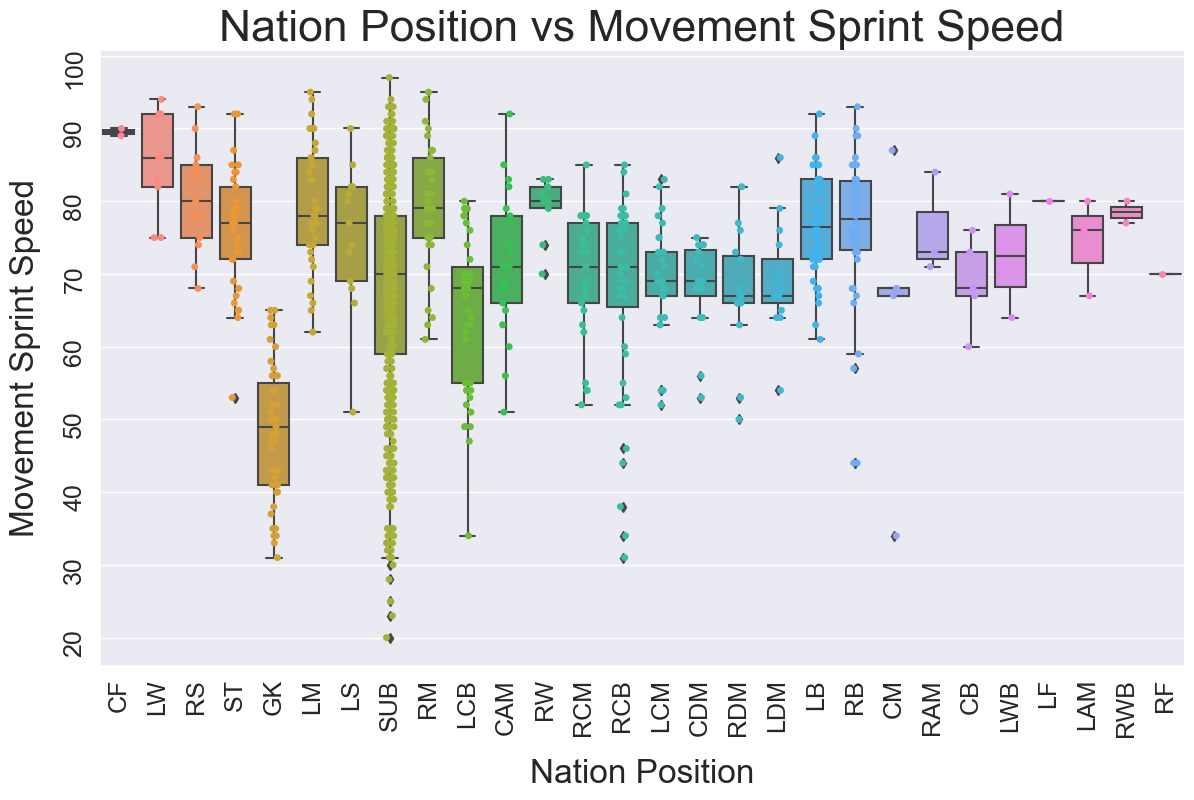

In [42]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(x = 'nation_position', y = "movement_sprint_speed",
                data = df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = 'nation_position', y = "movement_sprint_speed", data=df)
plt.xlabel("Nation Position", labelpad = 16, fontsize=24)
plt.ylabel("Movement Sprint Speed", labelpad = 16, fontsize=24)
plt.title("Nation Position vs Movement Sprint Speed", fontsize=32)
plt.show()

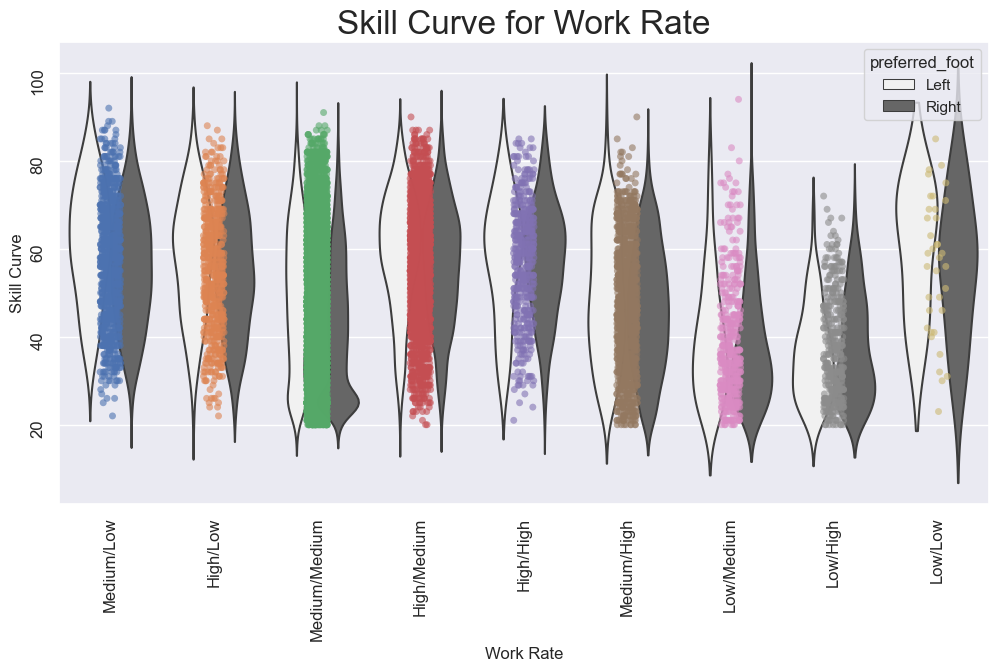

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
ax=sns.violinplot(x = "work_rate", y = "skill_curve", hue="preferred_foot",
                 data=df, inner=None, color = "0.4")
ax = sns.stripplot(x = "work_rate", y = "skill_curve", alpha = 0.6, data=df)
ax.tick_params(rotation=90, labelsize=12)
plt.xlabel("Work Rate", fontsize = 12)
plt.ylabel("Skill Curve", fontsize = 12)
plt.title("Skill Curve for Work Rate", fontsize=24)
plt.show()

C:\Users\Prosenjeet Saha\AppData\Local\Temp\ipykernel_5240\2090324020.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(d1.nationality, rotation=90)


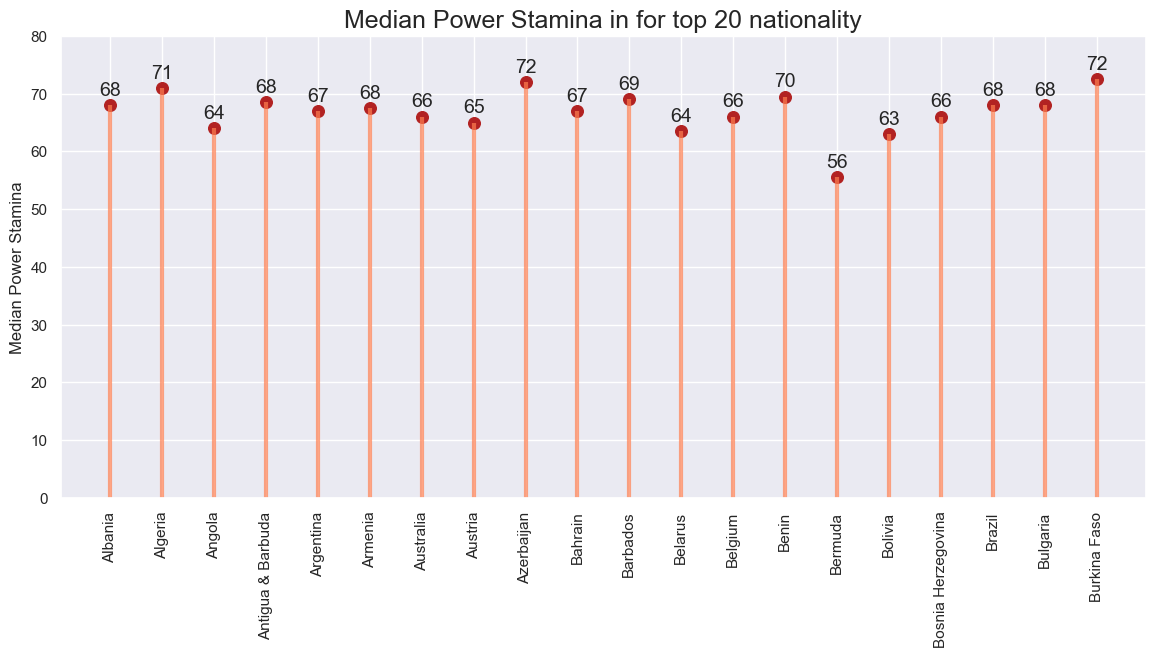

In [44]:
d = df.groupby('nationality')['power_stamina'].agg([np.median])
d1 = d[:20].reset_index()
d1 = d1.rename(columns={"median": 'power_stamina'})
fig, ax = plt.subplots(figsize=(14, 6))
ax.vlines(x=d1['nationality'], ymin=0, ymax = d1.power_stamina,
        color = 'coral', alpha = 0.7, linewidth = 3)
ax.scatter(x = d1["nationality"], y = d1["power_stamina"],
          s = 70, color = "firebrick")
ax.set_ylabel("Median Power Stamina", fontsize = 12)
ax.set_xticklabels(d1.nationality, rotation=90)
ax.set_ylim(0, 80)
ax.set_title("Median Power Stamina in for top 20 nationality", fontsize=18)
for row in d1.itertuples():
    ax.text(row.Index, row.power_stamina+1, s = round(row.power_stamina),
           horizontalalignment = 'center', verticalalignment='bottom', fontsize=14)
plt.show()